# Import modules

Let's import the modules that we will use.

In [1]:
import xarray as xr # For creating a NetCDF dataset

# Introducing the data

In this example, we will be loading a depth profile of some Chlorophyll A data. However, this example should be relevant for depth profiles of any data.

Nansen Legacy data can be found via the SIOS data access portal. All Nansen Legacy datasets should be returned when filtering using the 'AeN' collection. Please contact data.nleg@unis.no if you have any problems finding data.

I have downloaded the following dataset into my directory.

# Loading the data

In [2]:
data = xr.load_dataset('AeN_SeaWaterChlorophyllA_20190807_P1.nc')

# Overview of the file

Firstly, let's have a look at the entire dataset.

In [3]:
data

<xarray.Dataset>
Dimensions:          (DEPTH: 63, NCHAR: 36)
Coordinates:
  * DEPTH            (DEPTH) float64 5.0 10.0 15.0 20.0 ... 305.0 310.0 315.0
  * NCHAR            (NCHAR) float64 0.0 1.0 2.0 3.0 4.0 ... 32.0 33.0 34.0 35.0
Data variables:
    CHLOROPHYLL_A    (DEPTH) float64 0.0003204 0.0004977 nan ... nan 3.874e-05
    FILTERED_VOLUME  (DEPTH) float32 0.85 0.25 nan 0.5 nan ... nan nan nan 1.0
    PHAEOPIGMENT     (DEPTH) float64 0.0001181 0.0002231 nan ... nan 6.585e-05
    EVENT_ID         (DEPTH, NCHAR) object b'1' b'7' b'd' ... b'a' b'9' b'6'
Attributes: (12/38)
    id:                   8ac9acad-b481-50f0-a579-8d1170c6d3c0
    naming_authority:     The University Centre in Svalbard, Norway
    title:                Chlorophyll A and phaeopigments Nanen Legacy cruise...
    summary:              \n            This dataset is a collection of the a...
    keywords:             Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:  GCMD Science Keywords
    ...                   ...
    sampleType:           Chlorophyll a tot
    pi_name:              Anna Vader
    pi_institution:       UNIS
    pi_email:             annav@unis.no
    pi_address:           Forskningsparken, Longyearbyen
    bottomDepthInMetres:  325.59

At a glance, we can see it has 2 dimensions; they denote that there are 63 depth points and 36 characters (NCHAR).

There are 2 coordinate variables, with the same name as the dimensions. The DEPTH coordinate variable states the depth values for each of the 63 depth points. There is a 5 metre sample interval. The NCHAR coordinate variable is sequential, running from 0 to the last letter in the string, 35.

There are 4 data variables. The CHLOROPHYLL_A, FILTERED_VOLUME and PHAEOPIGMENT variables all have depth as their dimension. This means that the first chlorophyll a value corresponds to the first depth value, 5 meters in this case, and so on.

The EVENT_ID has two dimensions, DEPTH and NCHAR. This is therefore a 2 dimensional array. This tells us that there is a maximum of one EVENT_ID for each of the 63 depths, and it has 36 characters - though variables can have missing values, denoted using a fill value. More on this later.

There are finally 38 attributes that describe the datasets as a whole.

To look at all of the attributes:

In [4]:
data.attrs

{'id': '8ac9acad-b481-50f0-a579-8d1170c6d3c0',
 'naming_authority': 'The University Centre in Svalbard, Norway',
 'title': 'Chlorophyll A and phaeopigments Nanen Legacy cruise 2019706, station P1',
 'summary': '\n            This dataset is a collection of the acid-corrected chlorophyll A and phaeopigments measurements taken as part of the Nansen Legacy project \n            (www.arvenetternansen.com). The data is from a single depth profile from station P1 taken on 2019-08-07 at \n            31.2198°E and 76.0°N. Samples were collected from different depths of the water column.',
 'keywords': 'Oceans > Ocean chemistry > Chlorophyll',
 'keywords_vocabulary': 'GCMD Science Keywords',
 'geospatial_lat_min': 76.0,
 'geospatial_lat_max': 76.0,
 'geospatial_lon_min': 31.2198,
 'geospatial_lon_max': 31.2201,
 'time_coverage_start': '2019-08-07T16:58:00Z',
 'time_coverage_end': '2019-08-08T11:35:00Z',
 'Conventions': 'ACDD-1.3, CF-1.8',
 'history': "File created at 2021-02-10T12:36:44 using 

The 'Conventions' attribute is important. It tells us what standards have been followed when creating the file. If you are not sure what is meant by 'creator_name' for example, you can look it up and find a definition for this term.

The ACDD-1.3 standards are discovery metadata (helps someone find the data), and can be found here:


The CF-1.8 standards are use metadata (helps someone use the data), and can be found here:


To look at individual attributes:

In [5]:
data.attrs['pi_name']

'Anna Vader'

To see all the variables:

In [6]:
data.data_vars

Data variables:
    CHLOROPHYLL_A    (DEPTH) float64 0.0003204 0.0004977 nan ... nan 3.874e-05
    FILTERED_VOLUME  (DEPTH) float32 0.85 0.25 nan 0.5 nan ... nan nan nan 1.0
    PHAEOPIGMENT     (DEPTH) float64 0.0001181 0.0002231 nan ... nan 6.585e-05
    EVENT_ID         (DEPTH, NCHAR) object b'1' b'7' b'd' ... b'a' b'9' b'6'

To see an individual data variable:

In [7]:
data['CHLOROPHYLL_A']

<xarray.DataArray 'CHLOROPHYLL_A' (DEPTH: 63)>
array([3.20385176e-04, 4.97701800e-04,            nan, 4.10838750e-04,
                  nan, 3.16932750e-04,            nan, 3.85014600e-04,
                  nan, 9.90708300e-04, 1.21843035e-03, 2.21852925e-04,
                  nan,            nan,            nan,            nan,
                  nan, 3.09889800e-05,            nan,            nan,
                  nan,            nan,            nan, 1.65509325e-05,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 2.51198550e-05,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 3.87362250e-05])
Coordinates:
  * DEPTH    (DEPTH) float64 5.0 10.0 15.0 20.0 25.0 ... 300.0 305.0 310.0 315.0
Attributes:
    units:                  kg m-3
    long_name:              Mass concentration of Chlorophyll A in sea water,...
    standard_name:          mass_concentration_of_chlorophyll_a_in_sea_water
    coverage_content_type:  physicalMeasurement

We can see here that CHLOROPHYLL_A values only exist at certain depths. When creating the file, the creator provided a 'fill value' to show where no data exists. xarray automatically fills these in for us.

There are variable attributes. The standard_name refers to the name of the variable from a controlled vocabulary, the CF-1.8 standards. We can find a definition for this variable by following the link below.


The long_name is provided by the data creator, in their own words. 

# Plotting the data

xarray can be used to quickly plot the data. Other tools or python libraries (e.g. matplotlib) should be used to plot things in more detail.

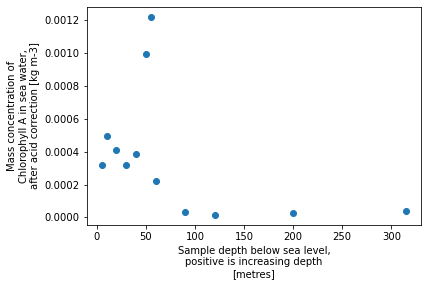

In [17]:
xr.plot.scatter(data,'DEPTH','CHLOROPHYLL_A')

If we want to plot a line graph, we first need to drop the NANs. We provide the dimension we want to drop based on.

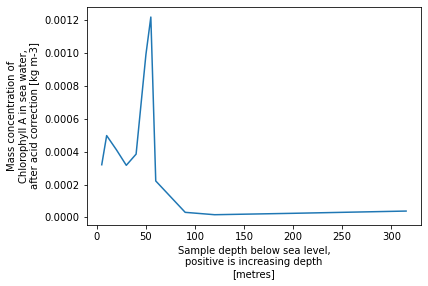

In [15]:
data['CHLOROPHYLL_A'].dropna('DEPTH').plot.line()

# Outputting the data to CSV or XLSX

Some people prefer to work with the data in a format that they're more familiar with. To output as CSV or XLSX:

In [30]:
import pandas

df = data['CHLOROPHYLL_A'].dropna('DEPTH').to_dataframe() # Creating a pandas dataframe, dropping NANs

df.to_csv('/home/lukem/chlorophyll_a_data_p1_20190807.csv')
df.to_excel('/home/lukem/chlorophyll_a_data_p1_20190807.xlsx')